![FIT_CTU_LOGO](https://fit.cvut.cz/media-a-pr/corporate-identity/logo-fit-en-cerna.svg)
# FIT ČVUT v Praze, [BI-PST](https://courses.fit.cvut.cz/BI-PST), ZS 2021/2022
## Domácí úloha - Daniel Bukač, Alexandr Czerný
## Data a parametry
Ze své trojice vyberte reprezentanta. Úlohu odevzdejte cvičícímu, ke kterému reprezentant přísluší podle původního přiřazení paralelek v Kosu. Parametry úlohy spočtěte následovně:

- K = den narození reprezentanta skupiny (1-31),
- L = počet písmen v příjmení reprezentanta,
- M = ((K+L)*47)mod(11)+1.

Načtěte datový soubor z R knihovny Sleuth2 podle následující tabulky:

|M|Datový soubor|Popis|
|:-:|:-------------:|:-----|
|1|case0101|skóre v kreativitě dle typu motivace|
|2|case0102|mzda dle pohlaví|
|3|case0201|délka humeru dle přežití vrabců|
|4|case0202|objem hipokampu dle schizofrenie|
|5|case0301|srážky dle ošetření mraků|
|6|case0302|koncentrace dioxinu dle vojenského působiště|
|7|case0402|doba řešení úkolu dle typu výuky geometrie|
|8|ex0112|krevní tlak dle diety|
|9|ex0211|přežití morčat dle typu experimentu|
|10|ex0221|váha dle přežití vrabců|
|11|ex0222|hladina cholesterolu dle prostředí|

## Úkoly

1. **(1b)** Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.
2. **(1b)** Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.
3. **(3b)** Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.
4. **(1b)** Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.
5. **(1b)** Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.
6. **(1b)** Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.
7. **(2b)** Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

### Retrieve dataset from R lib

In [127]:
### import required libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from scipy.stats import norm, expon, uniform

Podle následujícího výpočtu jsme zvolili datovou sadu **case0302**:

In [64]:
K = 15
L = len("Bukac")
M = ((K + L) * 47) % (11) + 1
display(6)

6

### Úkol 1 - Načtení a rozdělení datové sady, popis zkoumaných dat, odhad střední hodnoty, rozpylu a mediánu příslušného rozdělení

In [65]:
### load and split dataset

data = pd.read_csv("./data.csv")
data_vietnam = data[data.Veteran == "Vietnam"]
data_other = data[~(data.Veteran == "Vietnam")]
display(data)

,Dioxin,Veteran
0,0,Vietnam
1,0,Vietnam
2,0,Vietnam
3,0,Vietnam
4,0,Vietnam
...,...,...
738,9,Other
739,9,Other
740,10,Other
741,11,Other


In [66]:
### estimate expected value, variance and median of given distributions

### vietnam group estimations
E_vietnam = data_vietnam.Dioxin.mean()
VAR_vietnam = data_vietnam.Dioxin.var()
median_vietnam = data_vietnam.Dioxin.median()

### other group estimations
E_other = data_other.Dioxin.mean()
VAR_other = data_other.Dioxin.var()
median_other = data_other.Dioxin.median()

print("Vietnam group estimated values:")
print(">>> Expected value:", E_vietnam)
print(">>> Variance:", VAR_vietnam)
print(">>> Median:", median_vietnam)
print()
print("Other group estimated values:")
print(">>> Expected value:", E_other)
print(">>> Variance:", VAR_other)
print(">>> Median:", median_other)

Vietnam group estimated values:
>>> Expected value: 4.260061919504644
>>> Variance: 6.98342573259414
>>> Median: 4.0

Other group estimated values:
>>> Expected value: 4.185567010309279
>>> Variance: 5.298539518900344
>>> Median: 4.0


### Úkol 2 - Odhad hustoty a distribuční funkce pomocí histogramu a empirické distribuční funkce pro jednotlivá rozdělení

[Text(0.5, 1.0, 'Vietnam group - estimate of the distribution using histogram'),
 Text(0.5, 0, 'Dioxin concentration')]

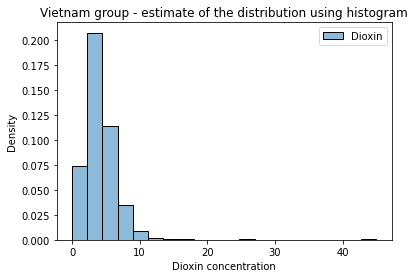

In [67]:
ax = sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density"
)
ax.set(
    title="Vietnam group - estimate of the distribution using histogram",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Other group - estimate of the distribution using histogram'),
 Text(0.5, 0, 'Dioxin concentration')]

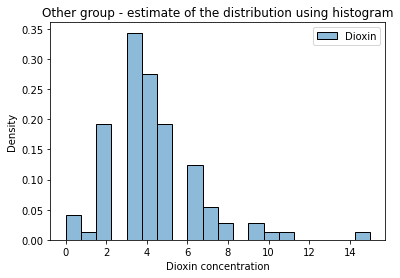

In [68]:
ax = sb.histplot(
    data=data_other,
    bins=20,
    stat="density"
)
ax.set(
    title="Other group - estimate of the distribution using histogram",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Vietnam group - estimate of the distribution using empirical distribution function'),
 Text(0.5, 0, 'Dioxin concentration')]

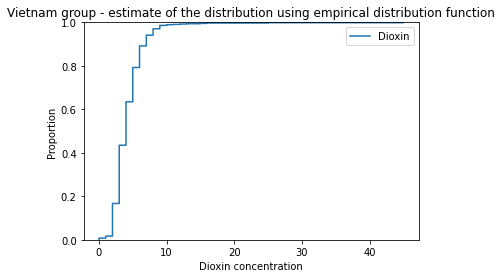

In [69]:
ax = sb.ecdfplot(data=data_vietnam)
ax.set(
    title="Vietnam group - estimate of the distribution using empirical distribution function",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Other group - estimate of the distribution using empirical distribution function'),
 Text(0.5, 0, 'Dioxin concentration')]

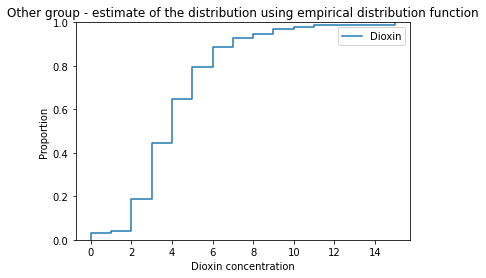

In [70]:
ax = sb.ecdfplot(data=data_other)
ax.set(
    title="Other group - estimate of the distribution using empirical distribution function",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Vietnam group - density estimation of the distribution'),
 Text(0.5, 0, 'Dioxin concentration')]

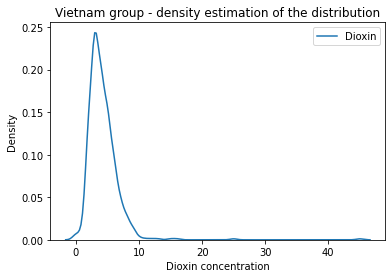

In [119]:
ax = sb.kdeplot(data=data_vietnam, bw_adjust=.75)
ax.set(
    title="Vietnam group - density estimation of the distribution",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Other group - density estimation of the distribtuin'),
 Text(0.5, 0, 'Dioxin concentration')]

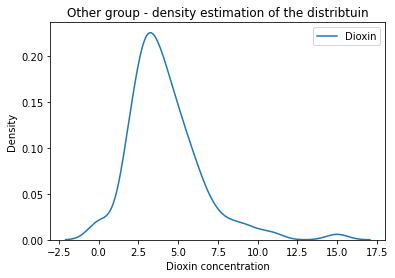

In [120]:
ax = sb.kdeplot(data=data_other, bw_adjust=.75)
ax.set(
    title="Other group - density estimation of the distribtuin",
    xlabel="Dioxin concentration"
)

### Úkol 3 - Pro každou skupinu zvlášť odhadnout parametry normálního, exponenciálního a rovnoměrného rozdělení. Dále zanést příslušné hustoty s odhadnutými parametry do histogramu dané skupiny. Diskuse, které z rozdělení nejlépe odpovídá pozorovaným datům

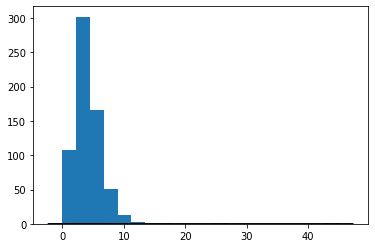

In [137]:
### Vietnam group - normal distr
# norm_distr_expected_value, norm_distr_variance = norm.fit(data_vietnam.Dioxin, method="MLE")
# expon_distr_lambda = expon.fit(data_vietnam.Dioxin, method="MLE")
# uniform_distr_a, uniform_distr_b = uniform.fit(data_vietnam.Dioxin, method="MLE")

# display(
#     norm_distr_expected_value,
#     norm_distr_variance,
#     expon_distr_lambda,
#     uniform_distr_a,
#     uniform_distr_b
# )

mu, o = norm.fit(data_vietnam.Dioxin, method="MLE")

fig, ax = plt.subplots()

# ax = sb.histplot(data=data_vietnam, bins=20)

ax.hist(data_vietnam.Dioxin, bins=20)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, o)
ax.plot(x, p, 'k')
plt.show()

In [85]:
norm_distr_expected_value, norm_distr_variance = norm.fit(data_other.Dioxin, method="MLE")
expon_distr_lambda = expon.fit(data_other.Dioxin, method="MLE")
uniform_distr_a, uniform_distr_b = uniform.fit(data_other.Dioxin, method="MLE") 

display(
    norm_distr_expected_value,
    norm_distr_variance,
    expon_distr_lambda,
    uniform_distr_a,
    uniform_distr_b
)

4.185567010309279

2.2899596940009213

(0.0, 4.185567010309279)

0.0

15.0